In [1]:
library("IRdisplay")
library("factoextra")
library("dplyr")
library("corrplot")

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.88 loaded



# 8.11

component analysis of the data using both the covariance matrix S and the correlation matrix R. What have you learned? Does it make any difference which matrix is chosen for analysis? Can the data be summarized in three or fewer dimensions? Can you interpret the principal components?

In [2]:
tot_pop <- c(5.935, 1.523, 2.599, 4.009, 4.687, 8.044, 2.766, 6.538, 6.451, 3.314, 3.777, 1.530, 2.768, 6.585)
med_school_year <- c(14.2, 13.1, 12.7, 15.2, 14.7, 15.6, 13.3, 17, 12.9, 12.2, 13, 13.8, 13.6, 14.9)
tot_emp <- c(2.265, .597, 1.237, 1.649, 2.312, 3.641, 1.244, 2.618, 3.147, 1.606, 2.119, .798, 1.336, 2.763)
health_serv <- c(2.27, .75, 1.11, .81, 2.5, 4.51, 1.03, 2.39, 5.52, 2.18, 2.83, .84, 1.75, 1.91)
med_home_val <- c(2.91, 2.62, 1.72, 3.02, 2.22, 2.36, 1.97, 1.85, 2.01, 1.82, 1.8, 4.25, 2.64, 3.17)

censusData <- cbind(tot_pop, med_school_year, tot_emp, health_serv, med_home_val)
censusData <- data.frame(censusData)
head(censusData)

,tot_pop,med_school_year,tot_emp,health_serv,med_home_val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.935,14.2,2.265,2.27,2.91
2,1.523,13.1,0.597,0.75,2.62
3,2.599,12.7,1.237,1.11,1.72
4,4.009,15.2,1.649,0.81,3.02
5,4.687,14.7,2.312,2.50,2.22
6,8.044,15.6,3.641,4.51,2.36


## a. Covariance Matrix

Sebelum Transformasi pada $X_{5}$

In [3]:
covMat <- cov(censusData)
covMat

,tot_pop,med_school_year,tot_emp,health_serv,med_home_val
tot_pop,4.3075558,1.6836802,1.8027760,2.1553257,-0.2534744
med_school_year,1.6836802,1.7674725,0.5880264,0.1779780,0.1755495
tot_emp,1.8027760,0.5880264,0.8006685,1.0648280,-0.1583390
health_serv,2.1553257,0.1779780,1.0648280,1.9694747,-0.3568066
med_home_val,-0.2534744,0.1755495,-0.1583390,-0.3568066,0.5043802


Setelah Transformasi pada $X_{5} = 10 X_{5}$

In [4]:
newCensusData <- mutate(censusData, med_home_val = 10*med_home_val)
covMat <- cov(newCensusData)
covMat

,tot_pop,med_school_year,tot_emp,health_serv,med_home_val
tot_pop,4.307556,1.6836802,1.8027760,2.155326,-2.534744
med_school_year,1.683680,1.7674725,0.5880264,0.177978,1.755495
tot_emp,1.802776,0.5880264,0.8006685,1.064828,-1.583390
health_serv,2.155326,0.1779780,1.0648280,1.969475,-3.568066
med_home_val,-2.534744,1.7554945,-1.5833901,-3.568066,50.438022


Terlihat bahwa transformasi $X5 = 10X_{5}$ menyebabkan perubahan matriks kovarians pada elemen $\sigma_{5i}$ dan $\sigma_{i5}$ pada matriks kovarians awal untuk $ i =$ {$1, 2, 3, 4, 5$}. Misal $\sigma_{ij}^*$ adalah elemen baris ke-i dan kolom ke-j
dari matriks kovarians hasil transformasi, maka :

untuk $i \neq 5$ \
$$ \sigma_{5i}^* = cov(X_{5}^*,X_{i}) $$
$$ \sigma_{5i}^* = cov(10X_{5},X_{i}) $$
$$ \sigma_{5i}^* = 10cov(X_{5},X_{i}) $$ \
diperoleh \
$$ \sigma_{5i}^* = 10\sigma_{5i}$$
karena kesimetrisan kovarians, berlaku juga 
$$ \sigma_{i5}^* = \sigma_{5i}^* = 10\sigma_{5i}$$

untuk $i = 5$ \
$$ \sigma_{5i}^* = cov(X_{5}^*,X_{5}^*) $$
$$ \sigma_{55}^* = cov(10X_{5},10X_{5}) $$
diperoleh 
$$ \sigma_{55}^* = 100 cov(X_{5},X_{5})$$

Dalam artian lain kita dapat memperoleh matriks korelasi setelah transformasi dengan mengalikan elemen
off diagonal yang mengandung variabel $X_{5}$ (baris ke-5 atau kolom ke-5) dengan 10, dan mengalikan elemen
diagonal yang mengandung variabel $X_{5}$ (baris ke-5 dan kolom ke-5) dengan 100

## Principal Component (Centered)

In [5]:
# Eigenvalue & Eigenvector
eigen(covMat)

eigen() decomposition
$values
[1] 50.96935726  6.64988991  1.41999710  0.22978608  0.01416317

$vectors
            [,1]       [,2]        [,3]         [,4]         [,5]
[1,]  0.05765977 0.78220765  0.02307185  0.541282426 -0.302171422
[2,] -0.03281610 0.35032828  0.76422159 -0.540439691 -0.009137870
[3,]  0.03467366 0.32717525 -0.10109097  0.051177198  0.937504990
[4,]  0.07557524 0.39085238 -0.63207658 -0.642117054 -0.172301138
[5,] -0.99432619 0.07491367 -0.07545108  0.002204195  0.002375237


In [6]:
# First 2 Principal Component
prcompObj <- prcomp(newCensusData)
data.frame(summary(prcompObj)$rotation[ , 1:2])

,PC1,PC2
,<dbl>,<dbl>
tot_pop,0.05765977,-0.78220765
med_school_year,-0.03281610,-0.35032828
tot_emp,0.03467366,-0.32717525
health_serv,0.07557524,-0.39085238
med_home_val,-0.99432619,-0.07491367


## PCA Interpretation

In [7]:
# Variance Explained by First 2 Principal Component
data.frame(summary(prcompObj)$importance)

,PC1,PC2,PC3,PC4,PC5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Standard deviation,7.139283,2.578738,1.191636,0.4793601,0.1190091
Proportion of Variance,0.859760,0.112170,0.023950,0.0038800,0.0002400
Cumulative Proportion,0.859760,0.971930,0.995890,0.9997600,1.0000000


Terlihat bahwa hanya dengan menggunakan dua principal component telah mampu untuk menjelaskan sebanyak 97.193% struktur keragaman dari data awal, atau terdapat sebesar kehilangan informasi 2.807%
apabila kita menggunakan kedua principal component tersebut untuk merepresentasikan data awal. Tingkat
kehilangan informasi tersebut cukup kecil, mengingat kita hanya kehilangan ~ 3% untuk mereduksi ~60%
ukuran data awal menjadi dua principal component.

In [8]:
# Correlation of Each Determining Variable in Principal Component
# utility function
computeCor_ik <- function(eigenVector_i,lamda_i, SD){
    return(eigenVector_i*sqrt(lamda_i)/SD)
}
computeCor <- function(S, name){
    result <- c()
    # number of variables
    p <- ncol(S)
    # eigen stuff
    e <- eigen(S)
    # standard deviation vector
    SD <- sqrt(diag(S))
    for(i in 1 : p){
        result <- cbind(result,computeCor_ik(e$vectors[,i], e$values[i], SD))
    }
    result <- as.data.frame(result)
    for(i in 1 : p){
        rownames(result)[i] <- nama[i]
        colnames(result)[i] <- paste("PC", i, sep="")
    }
    return(result)
}
nama <- c("X1", "X2", "X3", "X4", "X5")
computeCor(covMat, nama)[,1:2]

,PC1,PC2
,<dbl>,<dbl>
X1,0.1983408,0.97188266
X2,-0.1762240,0.67952602
X3,0.2766482,0.94289056
X4,0.3844669,0.71819899
X5,-0.9995498,0.02720128


Berdasarkan tabel korelasi principal component terhadap variabel penentu nya, dengan menganggap variabel lain konstan (ceteris paribus), maka terdapat hubungan linear yang sangat kuat diantara principal
component 1 dengan variabel median nilai jual rumah, di sisi lain variabel yang berpengaruh secara
linear kuat terhadap principal component 2 antara lain : total populasi, median waktu sekolah,
total penduduk yang bekerja, total pekerja sektor kesehatan. \
Variabel-variabel yang memiliki hubungan linear kuat terhadap masing-masing principal component menunjukkan dimensi, konsep, konstruk, ataupun fenomena yang mampu direpresentasikan atau diukur oleh
setiap principal component. Dalam konteks ini, principal component 1 merupakan suatu indeks atau
ukuran tunggal yang menggambarkan karakteristik / kondisi ekonomi masyarakat di negara tersebut, sedangkan principal component 2 mengukur aspek sosial-demografi masyarakat dalam suatu ukuran
yang ringkas. Dimana nilai principal component 1 yang tinggi akan berasosiasi dengan nilai median
nilai jual rumah yang rendah, dan nilai principal component 2 yang tinggi akan berasosiasi dengan
nilai total populasi, median waktu sekolah, total penduduk yang bekerja, total pekerja sektor
kesehatan yang tinggi. \
Hal ini tercermin pada variable plot dibawah dimana terdapat terdapat 4 variabel yang berdekatan dengan $PC_2$, yaitu $X_1, X_2, X_3, X_4$ dan satu variabel $X_5$ yang berdekatan dengan P C1, yang mengindikasikan
adanya korelasi antar variabel dan principal component yang saling berdekatan. Kemudian variabel X5 yang
memiliki proyeksi vektor terpanjang di ruang yang didefinisikan oleh $PC_1$ dan $PC_2$ menunjukkan bahwa
sebagian besar keragaman data awal yang dijelaskan oleh model berasal dari keragaman variabel ini.


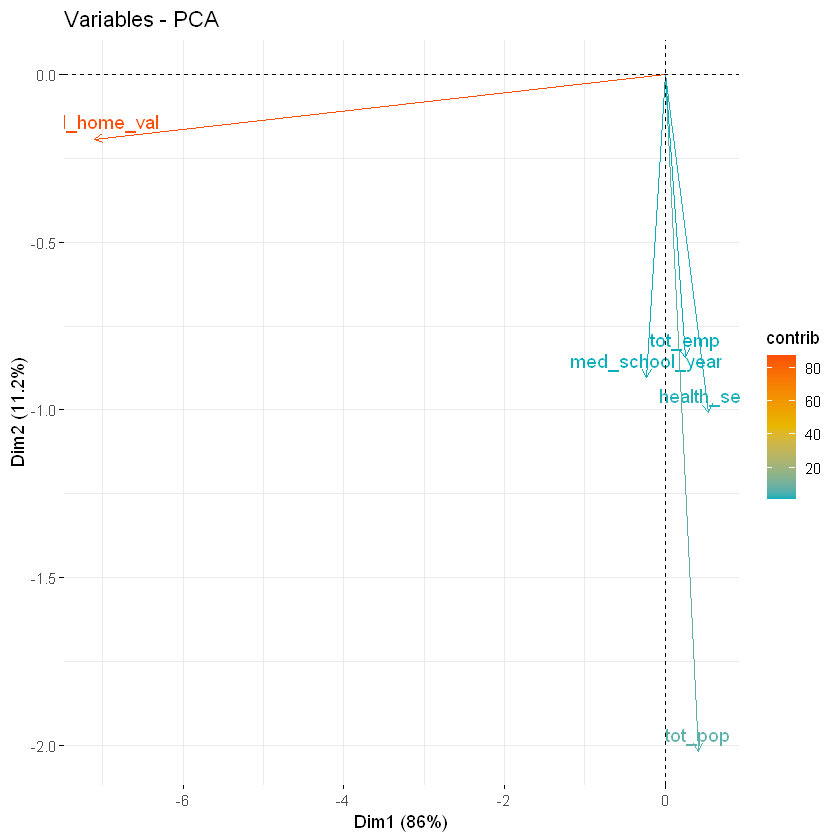

In [9]:
# Variable Plot
fviz_pca_var(prcompObj, col.var = "contrib",
             # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = FALSE # Avoid text overlapping
            )

### Perbedaan PCA Dengan dan Tanpa Transformasi $X_5^* = 10X_5$

In [10]:
# Principal Component
pcaCensusData <- prcomp(censusData)
data.frame(pcaCensusData$rotation)[1:2]

,PC1,PC2
,<dbl>,<dbl>
tot_pop,-0.78120807,0.07087183
med_school_year,-0.30564856,0.76387277
tot_emp,-0.33444840,-0.08290788
health_serv,-0.42600795,-0.57945799
med_home_val,0.05435431,0.26235528


In [11]:
# Correlation of Each Determining Variable in Principal Component
computeCor(cov(censusData))[1:2]

,PC1,PC2
,<dbl>,<dbl>
X1,0.9909495,-0.04562416
X2,0.6052660,-0.76768201
X3,0.9840179,0.12379586
X4,0.7991766,0.55167514
X5,-0.2014908,-0.49356853


Karena penentuan _loadings_ dari setiap _principal component_ bergantung kepada eigenvalue dan eigenvector dari matriks kovarians, maka sebarang transformasi yang hanya dilakukan pada suatu variabel tertentu dapat menyebabkan perubahan yang tidak dapat diprediksi pada loadings dari setiap principal component yang dihasilkan. Sebagai contoh, tanpa melakukan transformasi $X_5^* = X_5$ , variabel $X_5$ yang semula memiliki kontribusi dan korelasi yang tinggi terhadap penentuan P C1, sekarang justru tidak memiliki kontribusi yang cukup besar, dan memiliki korelasi yang lemah.\
Hal ini dapat dilihat pada variable plot dibawah, terlihat bahwa tanpa adanya transformasi $X_5^* = X_5$ , sekarang total variasi yang dapat dijelaskan oleh principal component lebih banyak berasal dari variasi variabel selain $X_5$ yang menunjukkan dampak dari perubahan satuan (dari 10.000 an menjadi 1000 an). Kemudian karena tidak ada lagi dominasi variabel $X_5$ dalam total variasi yang dijelaskan oleh principal component, maka sekarang kita dapat melihat adanya suatu struktur baru, yang didefinisikan oleh pengelompokkan
1. $X_1$ dan $X_3$
2. $X_2$
3. $X_4$
4. $X_5$

Dimana kelompok pertama menunjukkan suatu ukuran terkait dimensi demografi, terdiri atas variabel total penduduk dan total penduduk yang bekerja. Kelompok kedua menunjukkan ukuran pada dimensi pendidikan, terdiri atas variabel median waktu sekolah. Kelompok kedua menunjukkan ukuran pada dimensi kesehatan, terdiri atas variabel total pekerja sektor kesehatan. Terakhir, kelompok keempat menunjukkan ukuran pada dimensi ekonomi, terdiri atas variabel median nilai jual rumah.

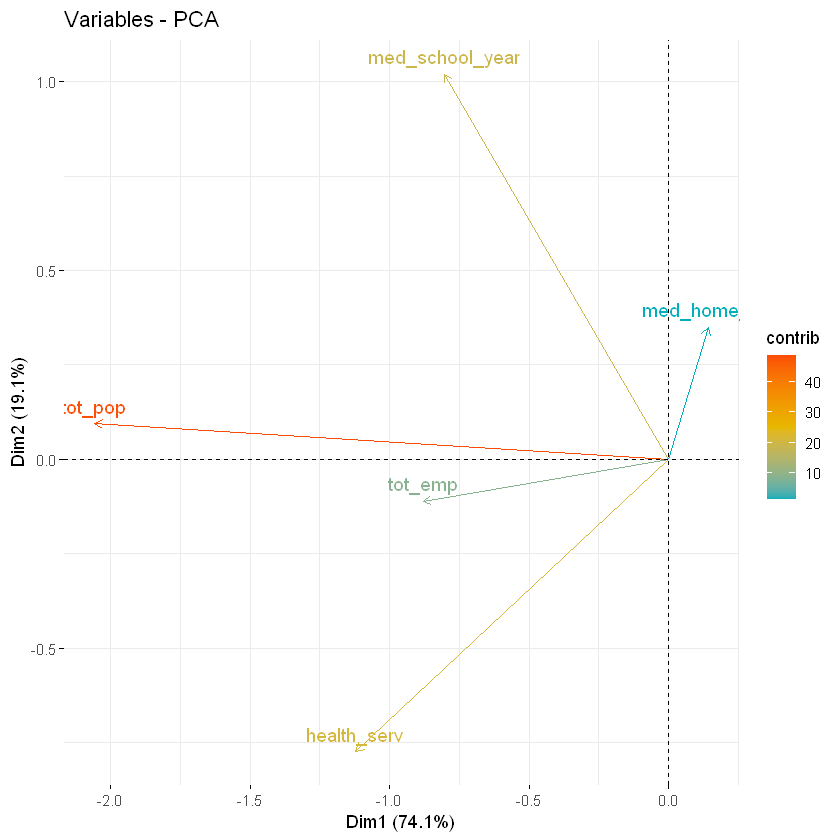

In [13]:
fviz_pca_var(pcaCensusData, col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = FALSE # Avoid text overlapping
            )

# 8.12

In [15]:
Wind <- c(8, 7, 7, 10, 6, 8, 9, 5, 7, 8, 6, 6, 7, 10, 10, 9, 8, 8, 9, 9, 10, 9, 8, 5, 6, 8, 6, 8, 6, 10, 8, 7, 5, 6, 10, 8, 5, 5, 7, 7, 6, 8)
SolarRadiation <- c(98, 107, 103, 88, 91, 90, 84, 72, 82, 64, 71, 91, 72, 70, 72, 77, 76, 71, 67, 69, 62, 88, 80, 30, 83, 84, 78, 79, 62, 37, 71, 52, 
             48, 75, 35, 85, 86, 86, 79, 79, 68, 40)
CO <- c(7, 4, 4, 5, 4, 5, 7, 6, 5, 5, 5, 4, 7, 4, 4, 4, 4, 5, 4, 3, 5, 4, 4, 3, 5, 3, 4, 2, 4, 3, 4, 4, 6, 4, 4, 4, 3, 7, 7, 5, 6, 4)
NO <- c(2, 3, 3, 2, 2, 2, 4, 4, 1, 2, 4, 2, 4, 2, 1, 1, 1, 3, 2, 3, 3, 2, 2, 3, 1, 2, 2, 1, 3, 1, 1, 1, 5, 1, 1, 1, 1, 2, 4, 2, 2, 3)
NO2 <- c(12, 9, 5, 8, 8, 12, 12, 21, 11, 13, 10, 12, 18, 1, 8, 9, 7, 1, 13, 9, 14, 7, 13, 5, 10, 7, 1, 7, 9, 7, 10, 12, 8, 10, 6, 9, 6, 13, 9, 8, 1, 6)
O3 <- c(8, 5, 6, 15, 10, 12, 15, 14, 11, 9, 3, 7, 10, 7, 10, 10, 7, 4, 2, 5, 4, 6, 11, 2, 23, 6, 11, 10, 8, 2, 7, 8, 4, 24, 9, 10, 12, 18, 25, 6, 14, 2)
HC <- c(2, 3, 3, 4, 3, 4, 5, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2)

airPollution <- cbind(Wind, SolarRadiation, CO, NO, NO2, O3, HC)
head(airPollution)

Wind,SolarRadiation,CO,NO,NO2,O3,HC
8,98,7,2,12,8,2
7,107,4,3,9,5,3
7,103,4,3,5,6,3
10,88,5,2,8,15,4
6,91,4,2,8,10,3
8,90,5,2,12,12,4


## PCA without Standardization (Centered)

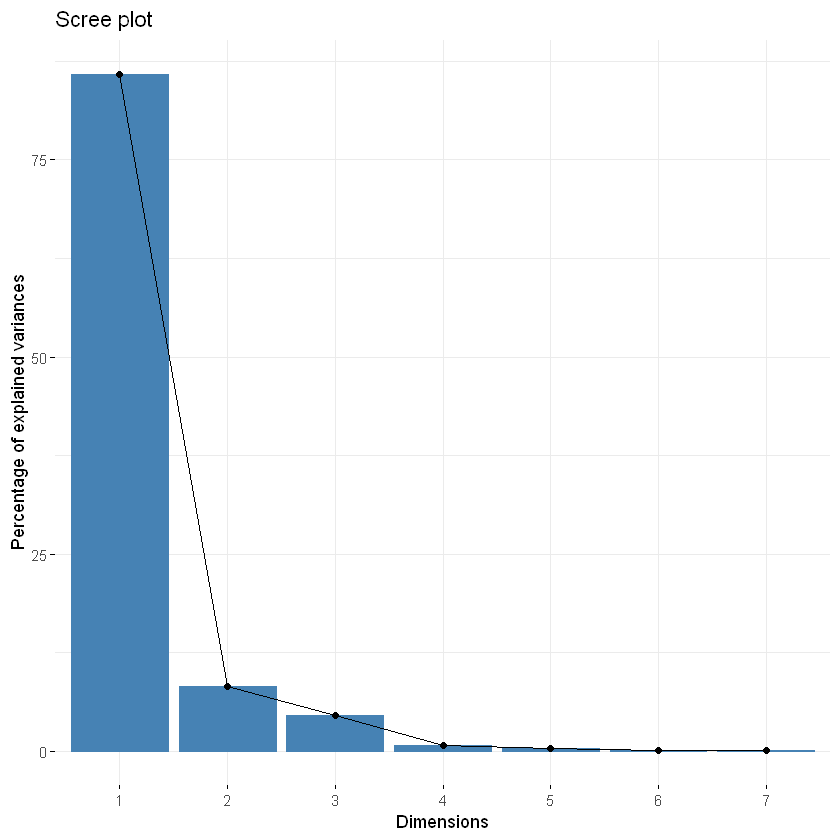

In [17]:
# Number of Principal Component
pcaAirPollution <- prcomp(airPollution)
# scree plot
fviz_eig(pcaAirPollution)

Berdasarkan scree plot diatas terlihat bahwa dua principal component pertama telah dapat menjelaskan
sebagian besar keragaman total dari data awal, dan penambahan principal component berikutnya tidak
memberikan tambahan yang cukup besar terhadap total varians data awal yang dapat dijelaskan. Dengan
demikian dua ukuran tersebut dapat digunakan untuk menggambarkan kondisi polusi udara di suatu wilayah.

In [18]:
# Principal Component
data.frame(summary(pcaAirPollution)$rotation)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Wind,-0.010109448,0.07485825,-0.002615667,0.8852827137,0.418344910,-0.003172232,-0.188518407
SolarRadiation,0.991845677,0.12737895,0.001775565,-0.0004430982,0.001344093,-0.002962455,-0.001680822
CO,0.014155078,-0.10119462,0.082493153,-0.2289481024,0.682040031,0.561699168,0.386849285
NO,-0.004724312,0.01010609,0.079348266,-0.3858913893,0.564436313,-0.474647021,-0.548442422
NO2,0.033572128,-0.27365157,0.951090606,0.0719274030,-0.113300469,0.002797444,-0.037363310
O3,0.121591486,-0.94457281,-0.284544106,0.0676044752,-0.005671012,-0.047442068,-0.071965855
HC,0.002385354,-0.02693284,0.036743010,0.0721180025,0.168373447,-0.675963635,0.712349229


In [19]:
# Variance Explained by Principal Component
data.frame(summary(pcaAirPollution)$importance)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Standard deviation,17.46415,5.398167,4.029037,1.609142,1.23450,0.7296484,0.5134769
Proportion of Variance,0.85847,0.082020,0.045690,0.007290,0.00429,0.0015000,0.0007400
Cumulative Proportion,0.85847,0.940490,0.986180,0.993470,0.99776,0.9992600,1.0000000


Berdasarkan tabel diatas terlihat bahwa dua principal component pertama telah dapat menjelaskan sebanyak ~ 95.4 % total keragaman dari data awal. Dalam artian lain terdapat kehilangan informasi sebanyak
4.6% apabila kita menggunakan principal component tersebut untuk merepresentasikan data awal. Tingkat
kehilangan informasi ini cukup kecil, mengingat bahwa kita hanya kehilangan 4.6% dari informasi yang
terkandung pada data awal untuk dapat mereduksi sebanyak 71.42% dari data tersebut menjadi dua ukuran
ringkas yang terkandung pada dua principal component pertama.

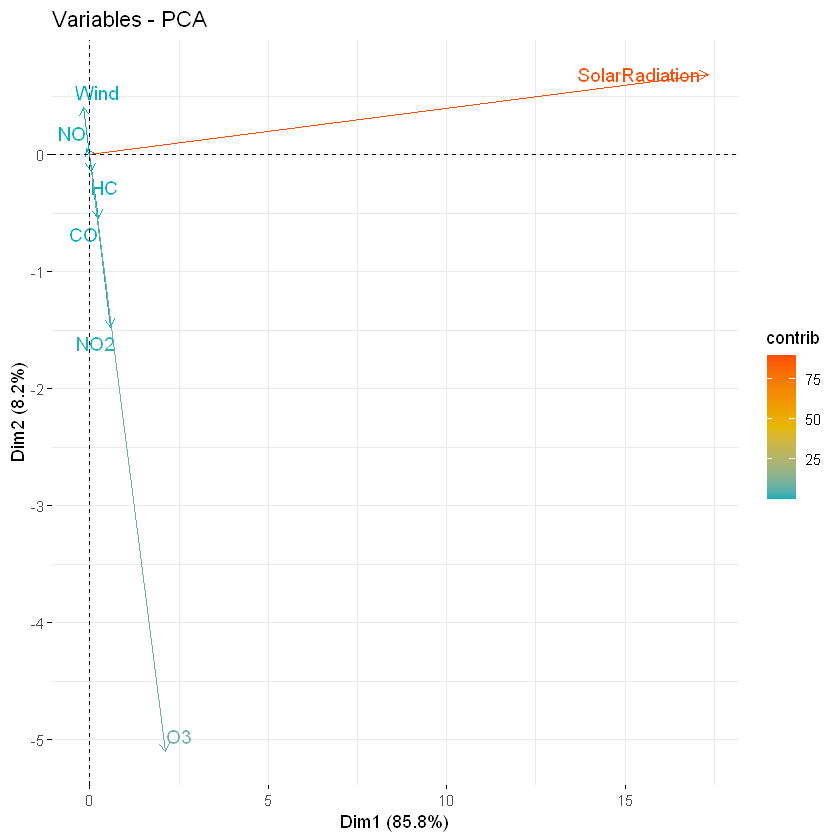

In [20]:
# Variable Plot
fviz_pca_var(pcaAirPollution, col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping
            )

Berdasarkan variable plot diatas terlihat bahwa P C1 mengukur suatu ukuran yang berkaitan dengan radiasi
surya, dan P C2 mengukur kondisi pencemaran udara. Dimana P C1 akan bernilai tinggi apabila terdapat
radiasi surya yang tinggi, dan P C2 akan bernilai tinggi ketika terdapat hasil pengukuran yang rendah dari
konsentrasi polutan CO, NO2, O3, HC di udara, disertai dengan laju angin yang tinggi.

In [ ]:
## PCA With Standardization

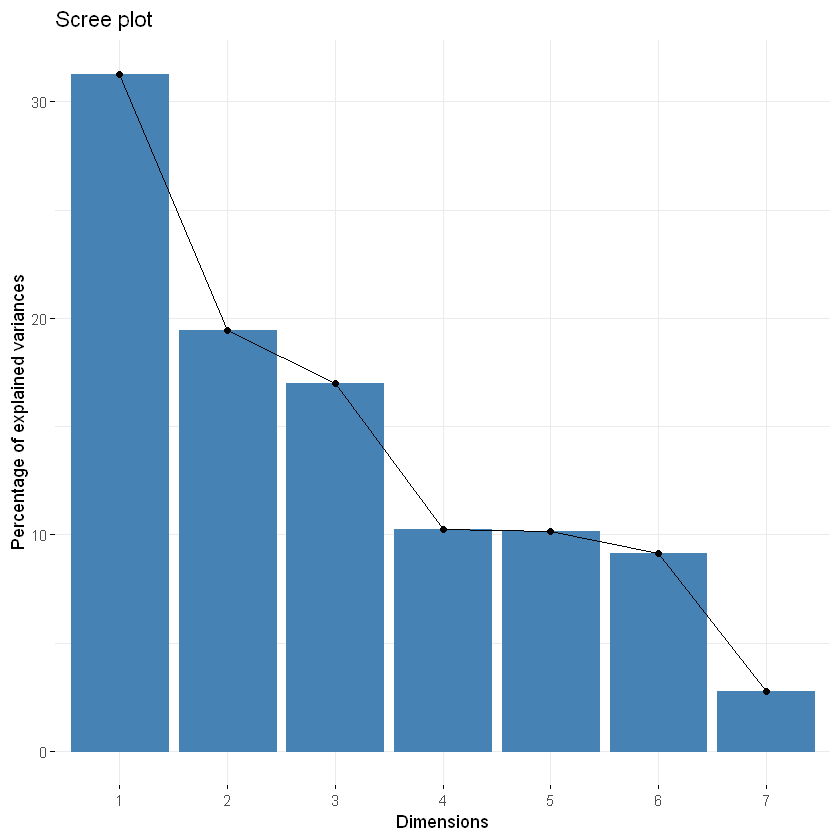

In [21]:
#Number of Principal Component
pcaAirPollutionStandardized <- prcomp(airPollution, scale=T)
#scree plot
fviz_eig(pcaAirPollutionStandardized)

Berbeda dengan sebelumnya, setelah dilakukan standardisasi, ternyata dibutuhkan lebih banyak principal
component untuk dapat merepresentasikan data awal dengan baik. Pada scree plot diatas, bahkan hingga
principal component ke 5 pun masih akan memperoleh tambahan kemampuan dalam menjelaskan total
variasi data awal yang cukup besar apabila dilakukan penambahan principal component

In [22]:
# Principal Component
data.frame(summary(pcaAirPollutionStandardized)$rotation)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Wind,-0.2775459,0.10606527,-0.68955619,-0.17994623,0.20770069,0.5343317,0.274226354
SolarRadiation,0.2562669,-0.53671382,-0.09562713,-0.74032083,0.20857998,-0.2133970,-0.001469969
CO,0.5573960,0.09717127,0.07815117,-0.04146104,0.07252529,0.6084338,-0.544600046
NO,0.3652508,0.58442144,0.24534992,-0.37318581,-0.12471655,0.0277367,0.556107576
NO2,0.4279437,0.11091605,-0.23559799,0.38450368,0.69557481,-0.3144648,0.136014471
O3,0.3898777,-0.53756664,-0.06378378,0.36089416,-0.36193780,0.2396786,0.486065556
HC,0.2793863,0.22003974,-0.62409033,-0.02168121,-0.52698898,-0.3763726,-0.253363847


In [23]:
# Variance Explained by Principal Component
data.frame(summary(pcaAirPollutionStandardized)$importance)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Standard deviation,1.479664,1.166224,1.089921,0.8473931,0.842392,0.7998615,0.441715
Proportion of Variance,0.312770,0.194300,0.169700,0.1025800,0.101370,0.0914000,0.027870
Cumulative Proportion,0.312770,0.507070,0.676770,0.7793600,0.880730,0.9721300,1.000000


Berdasarkan tabel diatas terlihat bahwa untuk dapat menjelaskan setidaknya 90% dari total keragaman
data awal, diperlukan minimal lima principal component pertama, padahal sebelumnya, tanpa standardisasi,
hanya dengan menggunakan dua principal component kita telah mampu menjelaskan ~95% keragaman dari
data awal. \
Adanya penambahan tingkat kehilangan data ini dapat disebabkan oleh penghilangan satuan akibat proses
standardisasi. Sebelumnya, total variasi yang dapat dijelaskan oleh principal component sebagian besar
berasal dari variasi variabel radiasi surya yang memang memiliki satuan yang berbeda dengan variabel
lainnya, yang mana menyebabkan nilai-nilai dari pengukuran variabel ini cenderung lebih besar, sehingga
mampu menjadi indikator tunggal yang dapat menjelaskan keseluruhan keragaman dari sistem. Tetapi
setelah dilakukan standardisasi, informasi yang terkandung pada variabel radiasi surya ternyata tidak
cukup untuk menjelaskan kompleksitas dari sistem / data awal yang ada, yang mana dalam konteks ini
adalah kondisi pencemaran udara di kota Los Angeles. Justru informasi tersebut tersebar di beberapa
variabel lainnya yang apabila kita proyeksikan ke dalam suatu ruang R2 yang didefinisikan oleh dua principal
component pertama akan membentuk pengelompokkan berdasarkan korelasi antar variabel sbb :
1. Kelompok pertama adalah radiasi surya dan O3. Kelompok ini mengukur dimensi pencemaran udara
akibat pemanasan global.
2. Kelompok kedua adalah NO, HC, NO2, CO. Kelompok ini mengukur dimensi pencemaran udara
akibat gas rumah kaca.
3. Kelompok ketiga adalah Wind. Kelompok ini mengukur dimensi pencemaran udara akibat perubahan kondisi atmosfer.


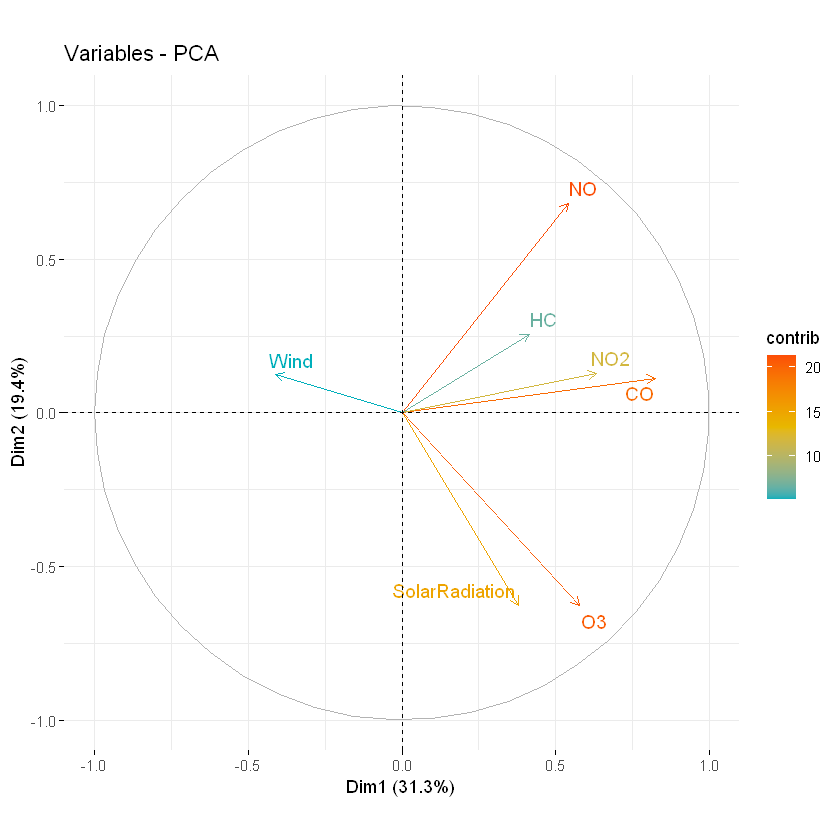

In [25]:
# Variable Plot
fviz_pca_var(pcaAirPollutionStandardized,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping
)

# 8.14

In [26]:
sweet_rate <- c(3.7, 5.7, 3.8, 3.2, 3.1, 4.6, 2.4, 7.2, 6.7, 5.4, 3.9, 4.5, 3.5, 4.5, 1.5, 8.5, 4.5, 6.5, 4.1, 5.5)
sodium <- c(48.5, 65.1, 47.2, 53.2, 55.5, 36.1, 24.8, 33.1, 47.4, 54.1, 36.9, 58.8, 27.8, 40.2, 13.5, 56.4, 71.6, 52.8, 44.1, 40.9)
potassium <- c(9.3, 8, 10.9, 12, 9.7, 7.9, 14, 7.6, 8.5, 11.3, 12.7, 12.3, 9.8, 8.4, 10.1, 7.1, 8.2, 10.9, 11.2, 9.4)

sweet_data <- cbind(sweet_rate, sodium, potassium)
sweet_data

sweet_rate,sodium,potassium
3.7,48.5,9.3
5.7,65.1,8.0
3.8,47.2,10.9
3.2,53.2,12.0
3.1,55.5,9.7
4.6,36.1,7.9
2.4,24.8,14.0
7.2,33.1,7.6
6.7,47.4,8.5
5.4,54.1,11.3


## Principal Component Analysis

In [28]:
# Principal Component
pcasweet <- prcomp(sweet_data)
data.frame(summary(pcasweet)$rotation)

,PC1,PC2,PC3
,<dbl>,<dbl>,<dbl>
sweet_rate,0.05084144,-0.57370364,-0.81748351
sodium,0.99828352,0.05302042,0.02487655
potassium,-0.02907156,0.81734508,-0.57541452


In [29]:
# Variance Explained by Principal Component
data.frame(summary(pcasweet)$importance)

,PC1,PC2,PC3
,<dbl>,<dbl>,<dbl>
Standard deviation,14.15848,2.128753,1.140786
Proportion of Variance,0.97173,0.021970,0.006310
Cumulative Proportion,0.97173,0.993690,1.000000


In [31]:
# Predict Principal Component
pca_prediction <- predict(pcasweet, sweet_data)
pca_prediction <- as.data.frame(pca_prediction)
head(pca_prediction)

,PC1,PC2,PC3
,<dbl>,<dbl>,<dbl>
1,3.066221,0.1601103,1.2282025
2,19.777203,-1.1697066,0.7542250
3,1.727022,1.3415655,0.1934514
4,7.654239,2.9029898,0.2002448
5,10.012072,1.2024134,1.6626626
6,-9.226038,-2.1579594,0.9895784


# QQ Plot

$PC_1$

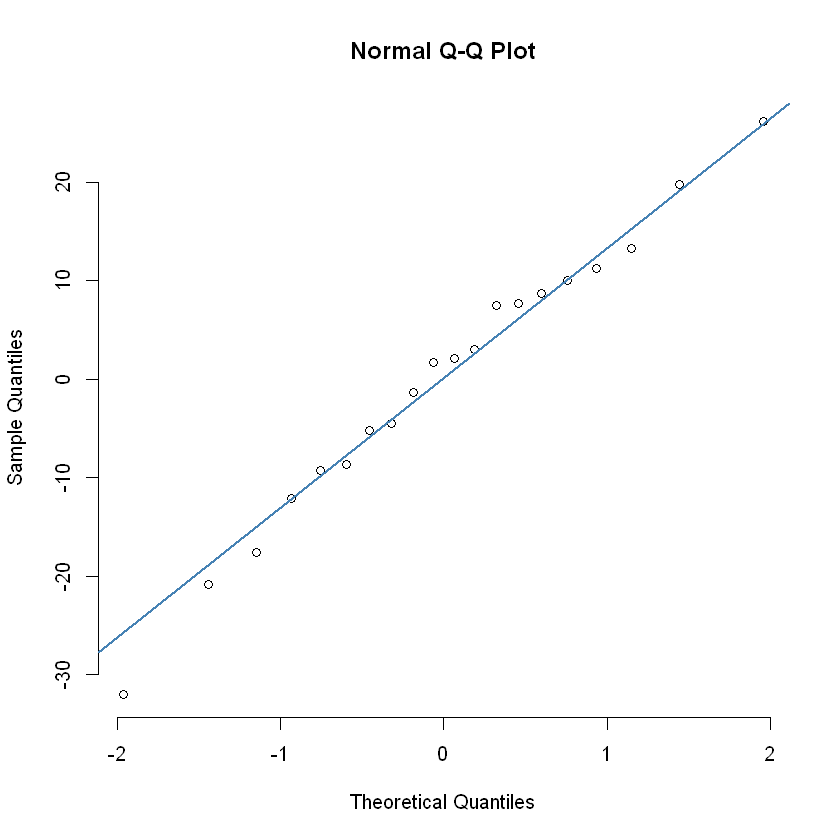

In [33]:
qqnorm(pca_prediction$PC1, pch = 1, frame = FALSE)
qqline(pca_prediction$PC1, col = "steelblue", lwd = 2)

Berdasarkan QQ-plot diatas tidak ada indikasi pelanggaran asumsi normalitas pada $PC_1$

$PC_2$

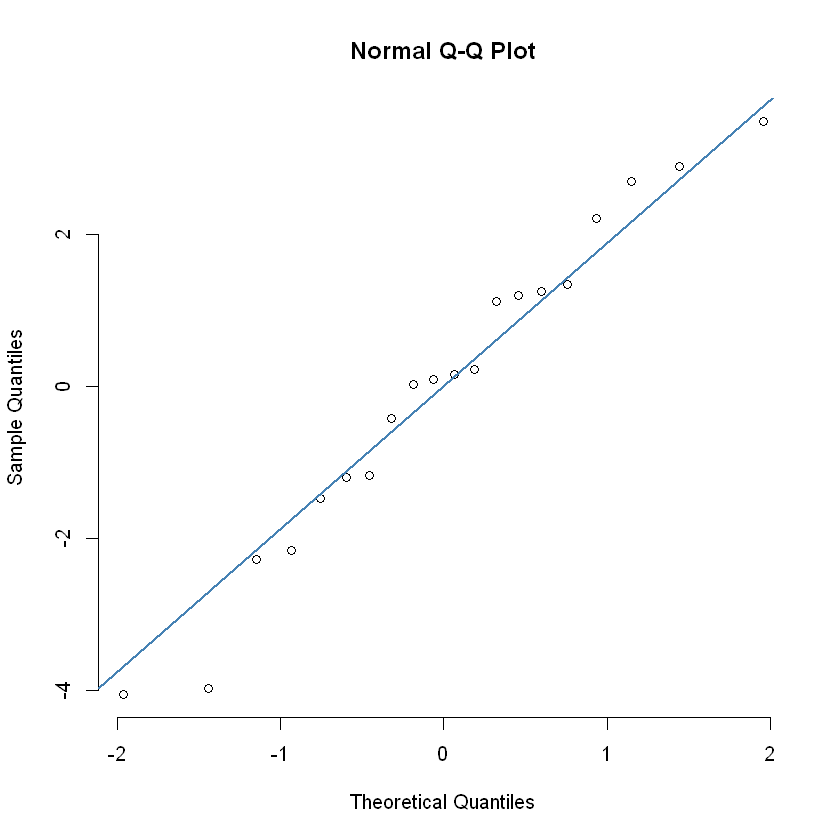

In [34]:
qqnorm(pca_prediction$PC2, pch = 1, frame = FALSE)
qqline(pca_prediction$PC2, col = "steelblue", lwd = 2)

Berdasarkan QQ-plot diatas tidak ada indikasi pelanggaran asumsi normalitas pada $PC_2$

$PC_3$

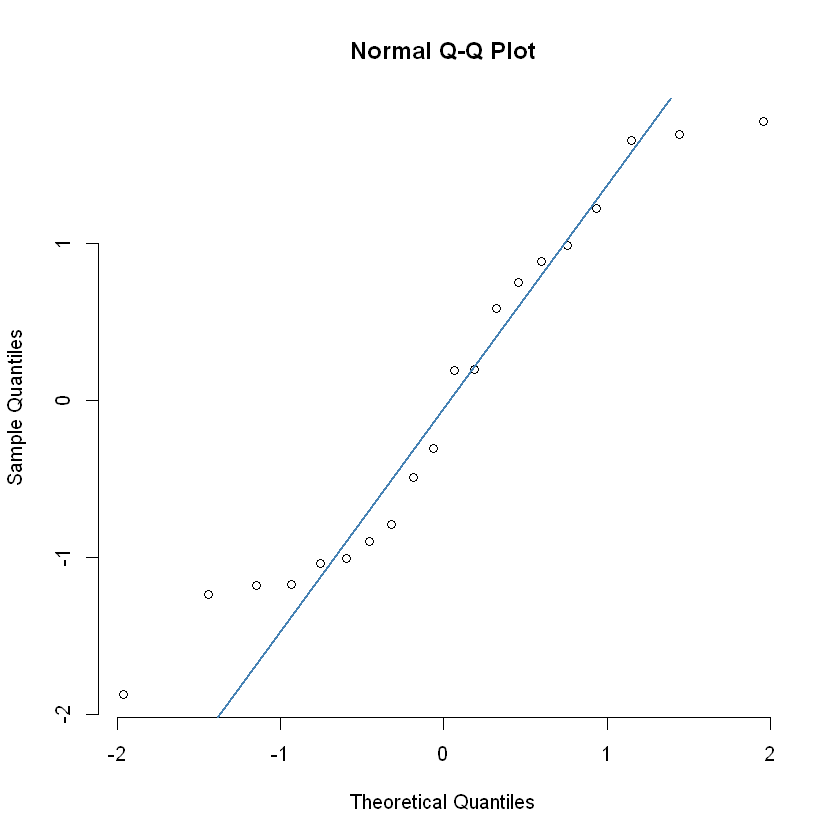

In [35]:
qqnorm(pca_prediction$PC3, pch = 1, frame = FALSE)
qqline(pca_prediction$PC3, col = "steelblue", lwd = 2)

Berdasarkan QQ-plot diatas terlihat adanya indikasi pelanggaran asumsi normalitas pada $PC_3$ yang disebabkan oleh distribusi empiris dari principal component tersebut yang cenderung menceng kanan (lebih
banyak nilai yang ekstrim kecil daripada yang seharusnya). Eksistensi observasi outlier juga ditemukan
pada QQ plot tersebut.